           Date   Open   High    Low  Close  Amount  Ups_Downs
0      2010/4/1  54.25  54.90  54.25  54.75   12561   0.000000
1      2010/4/2  54.75  54.90  54.65  54.75    5653   0.000000
2      2010/4/6  54.90  55.55  54.90  55.30   15860   0.994575
3      2010/4/7  55.35  55.50  55.30  55.40    6597   0.180505
4      2010/4/8  55.40  55.50  54.85  55.05    9030  -0.635786
...         ...    ...    ...    ...    ...     ...        ...
2460  2020/3/26  77.40  77.45  76.00  77.20   19216   0.453368
2461  2020/3/27  78.30  78.70  76.45  76.60   21954  -0.783290
2462  2020/3/30  74.70  76.15  74.05  75.85   13606  -0.988794
2463  2020/3/31  76.80  77.20  75.60  76.15    9764   0.393959
2464   2020/4/1  76.50  76.65  76.05  76.55    4285   0.522534

[2465 rows x 7 columns]


<Figure size 2400x800 with 0 Axes>

D:\ancode\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


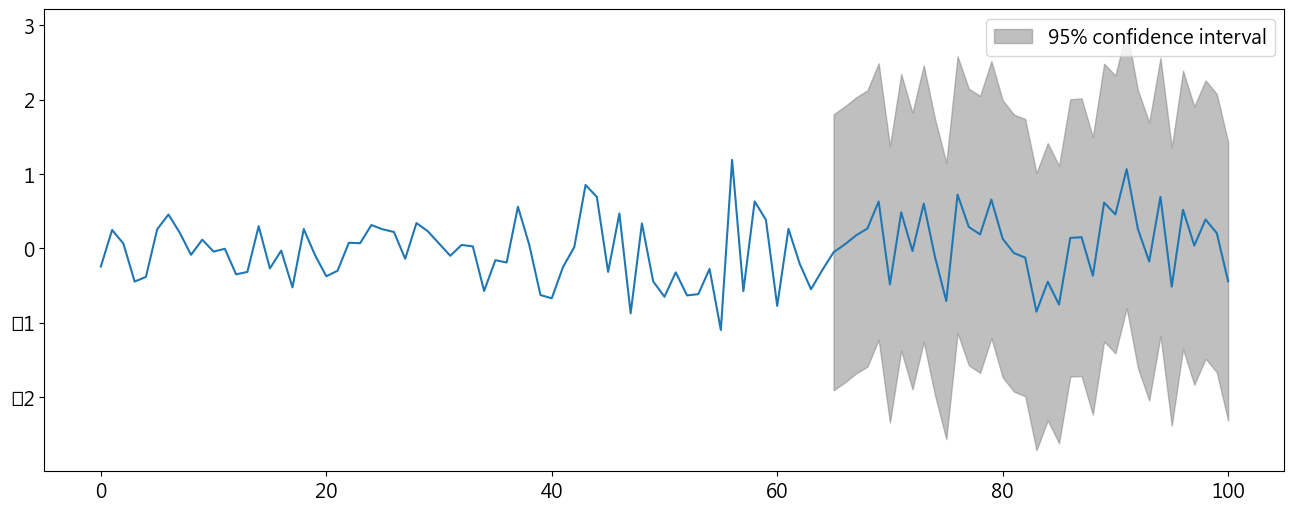

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import matplotlib.pyplot as plt

fp = pd.read_csv("0050.csv")
close = fp["Close"]
updown = [0] #第一天的漲幅為0
for i in range(1,len(fp)):
    Updowns = (fp["Close"][i] - fp["Close"][i-1])/fp["Close"][i] *100
    updown.append(Updowns)
    
fp["Ups_Downs"] = updown
print(fp)

#part2
# Default figure size
plt.figure(figsize=(24, 8)) #要先定義圖的大小
mod = AutoReg(fp["Ups_Downs"].values ,lags = 300)
res = mod.fit()
fig = res.plot_predict(2400, 2500)
plt.show()